# WordCloud

In [5]:
!pip install konlpy
!pip install plotly_express
import re
import konlpy
import pandas as pd


     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 47.9 MB/s 


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기

with open('/content/drive/MyDrive/DataSciencelab/Visualization/과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()


In [9]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)# ( 숫자, 공백, 문자+숫자,)가 아닌것

#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기

okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'6월': 3,
         '가계': 4,
         '가중': 1,
         '강화': 1,
         '거래': 2,
         '경신': 1,
         '관계자': 1,
         '관련': 1,
         '규모': 1,
         '규제': 1,
         '금고': 1,
         '금리': 17,
         '금융': 1,
         '금지': 1,
         '기관': 1,
         '기록': 2,
         '기자': 1,
         '기준': 2,
         '기후': 1,
         '늦기 전에': 1,
         '담보': 1,
         '대기': 1,
         '대로': 1,
         '대비': 3,
         '대책': 1,
         '대출': 15,
         '대출금': 1,
         '때문': 2,
         '리도': 1,
         '만원': 1,
         '매매': 1,
         '무단': 1,
         '발표': 1,
         '배포': 1,
         '보관': 1,
         '부동산': 2,
         '비율': 2,
         '사람': 2,
         '사상': 4,
         '사자': 1,
         '사태': 1,
         '상품': 1,
         '설명': 1,
         '속도': 1,
         '수단': 1,
         '수요': 1,
         '수준': 2,
         '시대': 2,
         '시장': 1,
         '신용': 7,
         '신용거래': 1,
         '신용등급': 1,
         '안전': 1,
         '얘기': 2,
         '역대': 5

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path


## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!apt-get install fonts-nanum* -qq

In [13]:
import matplotlib
import matplotlib.pyplot as plt
 

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
plt.rc('font', family='NanumGothic')


## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

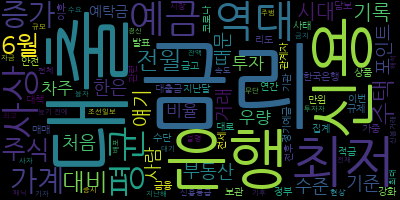

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = font_path)
wordcloud.generate_from_frequencies(c)

wordcloud.to_image()


# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [15]:
train = pd.read_csv('/content/drive/MyDrive/DataSciencelab/Visualization/train.csv',parse_dates=["datetime"])

## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [22]:
train['Year'] = train.datetime.dt.year
train['Month'] = train.datetime.dt.month
train['Date'] = train.datetime.dt.date
train['Hour'] = train.datetime.dt.hour
train['Minute']=train.datetime.dt.minute
train['Second'] = train.datetime.dt.second
train['weekday_name']  = train.datetime.dt.weekday

In [23]:
train.Weekday_name

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: Weekday_name, Length: 10886, dtype: int64

datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

In [24]:
train.weekday_name.replace((0,1,2,3,4,5,6), ('Monday','Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday','Sunday'), inplace = True)

## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

In [46]:
import seaborn as sns

In [47]:
year = train.groupby('Year').sum()
month = train.groupby('Month').sum()

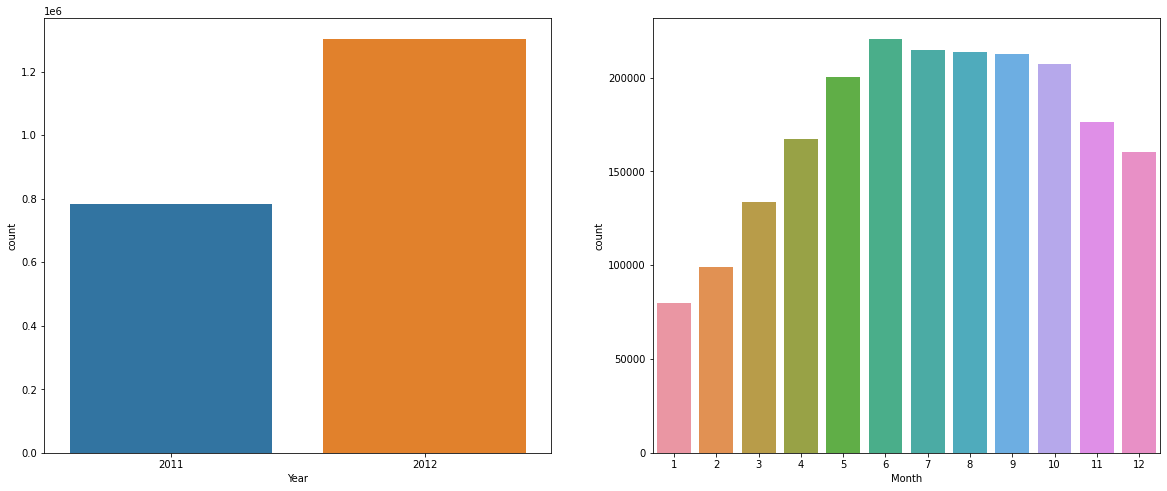

In [48]:
fig, ax = plt.subplots( 1,2 , figsize = (20,8))
sns.barplot(data = year, x=year.index, y ='count',ax=ax[0] )
sns.barplot(data = month, x=month.index, y ='count',ax=ax[1] )
#2012년에 대여량이 매우 늘었고

#관광 점수에 근거하여, 따뜻한 날씨 활동을 위하여 워싱턴 D.C.를 방문하기 위하여 년중 가장 좋은시간은 6월의 전체 달 및 8월중}에서10월초 까지입니다.
#라는 정보가 납득이 가는 결과로 6~10월은 날씨가 좋아 대여가 많은것으로 보인다


###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [29]:
train['Year_Month'] = train['Year'].map(str) + '-' + train['Month'].map(str)

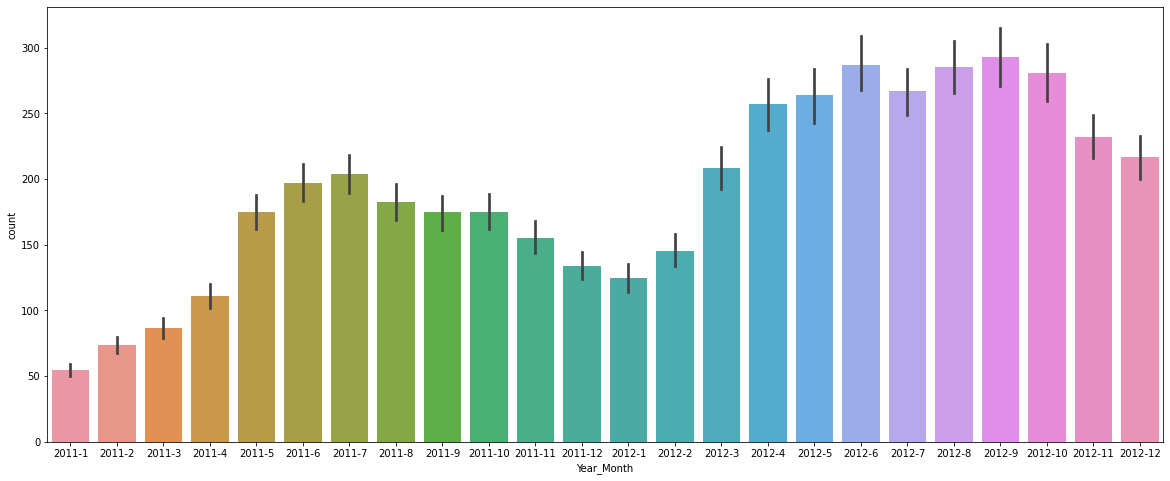

In [ ]:
#월별 평균(시간당?)
plt.subplots(1,1,figsize = (20,8))
sns.barplot(data =train, x='Year_Month', y='count')
#2011년부터 시간이 지나면서 대여량 점차적으로 증가했기 때문에 1월보다 12월 대여량이 많았다

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

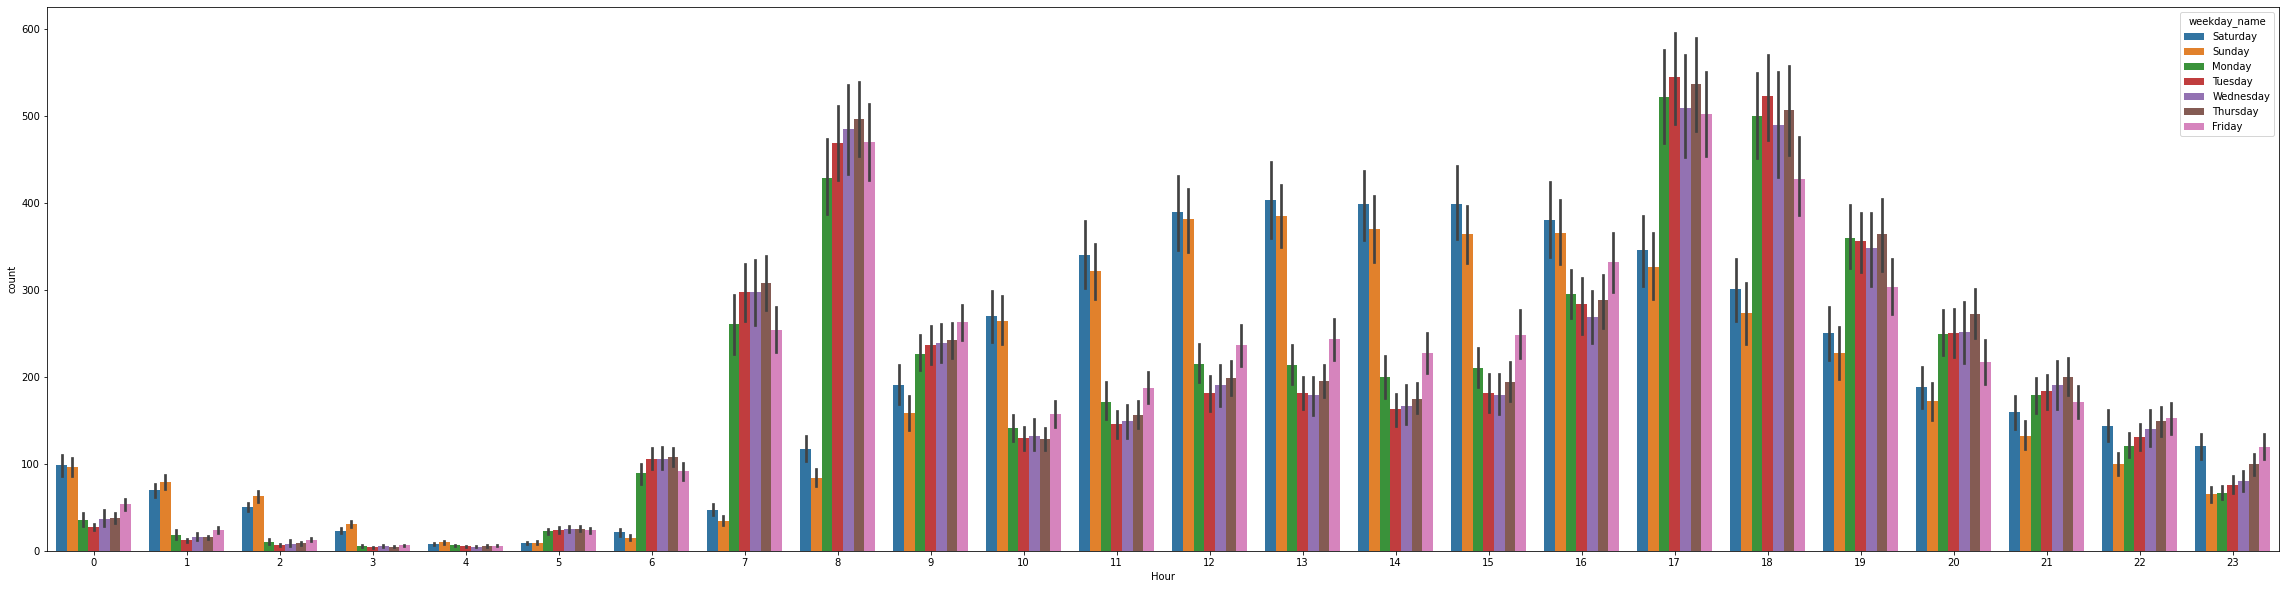

In [72]:
#barplot은 별루
plt.subplots(1,1,figsize =(40,10))
sns.barplot(data =train, x = 'Hour',y='count',hue='weekday_name')

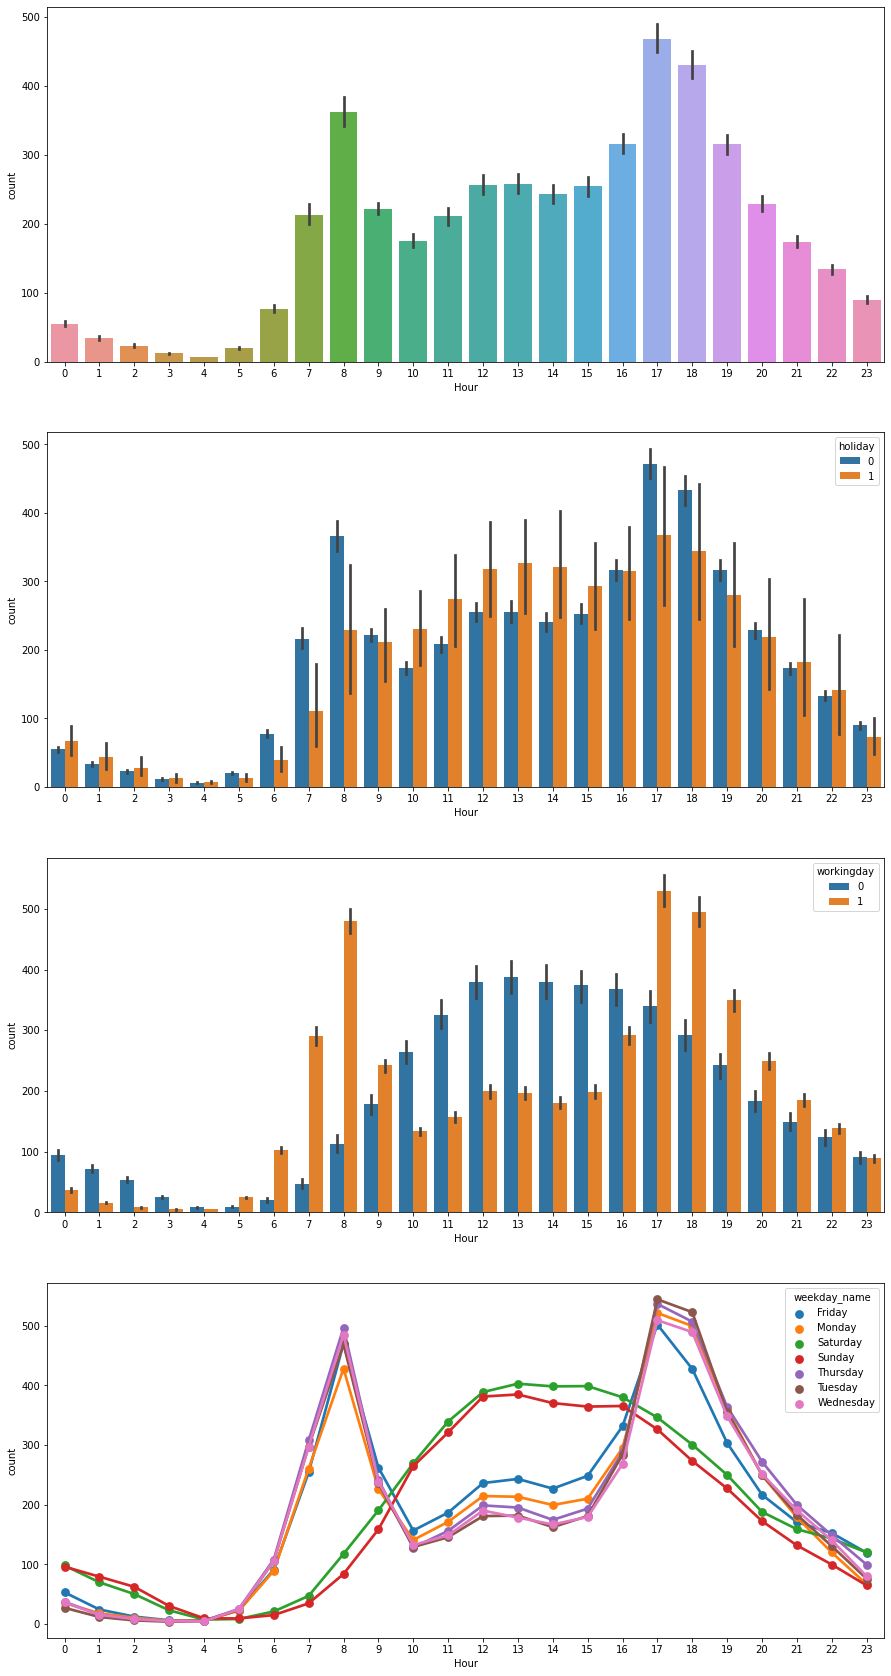

In [67]:
fig,ax = plt.subplots(4,1,figsize= (15,30))

sns.barplot(data=train,x='Hour',y='count',ax=ax[0])
#7~9시, 16~18시에 이용량이 많은걸로보아 일하는 시간을 제외한 시간에 이용량이 늘어나는 것으로 보인다.

sns.barplot(data=train,x='Hour',hue = 'holiday', y='count',ax=ax[1])

sns.barplot(data=train,x='Hour',hue = 'workingday', y='count',ax=ax[2])
# 휴일에는 일하는시간대인 9~18시에 대여량이 더 많고, 근무일은 일하는시간대인 9~18시에 대여량이 더 적다.  

w = train.groupby(['weekday_name','Hour']).mean().reset_index()
sns.pointplot(data=w, x='Hour', y='count', hue='weekday_name', ax =ax[3])

#대여량이 많은 시간대가 주말과 평일이 상반된다.

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [74]:
mpg = sns.load_dataset('mpg')

## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

In [85]:
xmpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


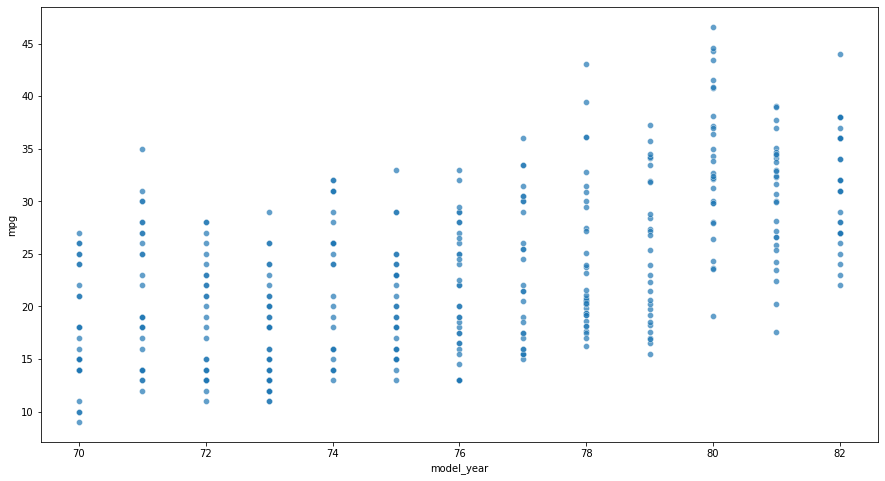

In [83]:
plt.figure(figsize=(15,8))
sns.scatterplot(mpg['model_year'],mpg['mpg'], alpha = 0.7 )

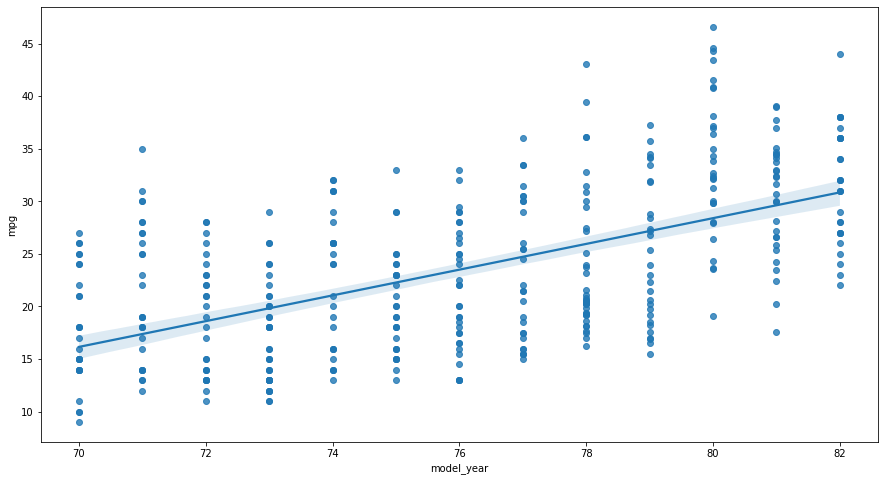

In [87]:
plt.figure(figsize = (15,8))
sns.regplot(data = mpg,x='model_year', y = 'mpg')

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
